In [1]:
! pip install GPy gpyopt

     |████████████████████████████████| 1.0MB 12.2MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633917 sha256=6deff8543fdb276d244a34cf870e57d3452544e41210f9715f787cb77d2d0348
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for gpyopt: filename=GPyOpt-1.2.6-cp36-none-any.whl size=83623 sha256=70f7e654654e68fcd0d9617610d552d2db6bcb03479963959b525715b8e06b71
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=36979d40d780d1b3740e661c2c9009a45fa4629c037e105b405d14a911ad5717
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPy gpyopt paramz


In [2]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from numpy.random import seed
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
seed(12354)

Populating the interactive namespace from numpy and matplotlib


## True value

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/My Drive/SCM

/content/drive/My Drive/SCM


In [5]:
# X real - free energy landscape 
dat = pd.read_csv('try_to_estim_1.txt', sep='\t',skiprows=[0,1], header=None)
X_real = np.array(dat[:][1])

# Y real
# Y_pos_real - probability for translocation pos
# Y_neg_real - probability for translocation neg
# rate - num of pos transloctions/ num of all translocations 
dat2 = pd.read_csv('try_to_estim_res1.txt', sep=' ',skiprows=[0,1], header=None)
dat2.drop(dat2.columns[0], axis = 1, inplace = True)
Y_pos_real = np.array(dat2[:][1])
Y_neg_real = np.array(dat2[:][2])

# Rate real
dat2 = pd.read_csv('try_to_estim_res1.txt', sep=' ',nrows=1, header=None)
rate_real = float(dat2[11])

# parameterizing real value
poly = Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', LinearRegression(fit_intercept=False))])
a = np.arange (51)
#b = X_try
b = X_real
poly.fit(a.reshape(-1,1), b)
b_pred = poly.predict(a.reshape(-1,1))
X_parametr_real = np.array(poly.named_steps['linear'].coef_)


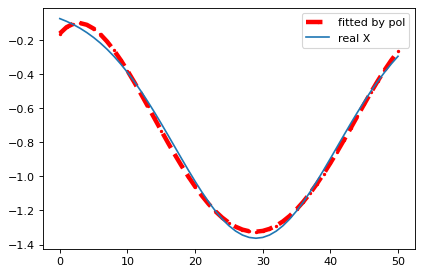

In [ ]:
# Real input X ad parametrized with polynomial function

plt.figure(dpi = 80)
plt.plot(b_pred,'go--', linewidth=4, markersize=2, color = 'red', label = 'fitted by pol')
plt.plot(X_real, label = 'real X', )
plt.legend()

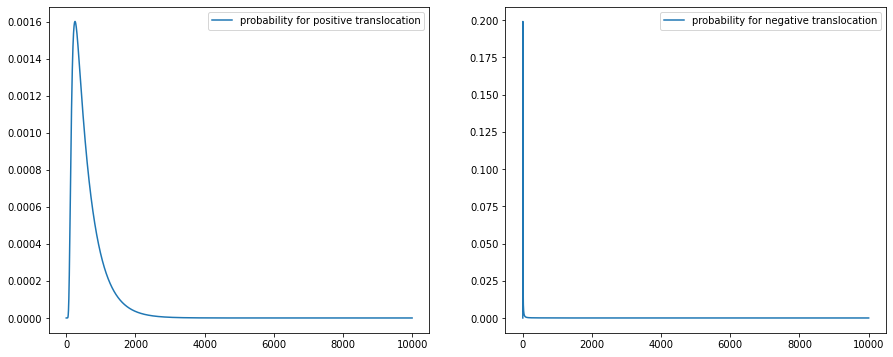

In [ ]:
# plots for probability distributions
# 1) successful translocation
# 2) unsuccessful translocation

fig, axes = plt.subplots(1, 2)
axes[0].plot(Y_pos_real, label = 'probability for positive translocation')
axes[0].legend()
axes[1].plot(Y_neg_real, label = 'probability for negative translocation')
axes[1].legend()

fig.set_figwidth(15)    #  ширина и
fig.set_figheight(6)  

plt.show()

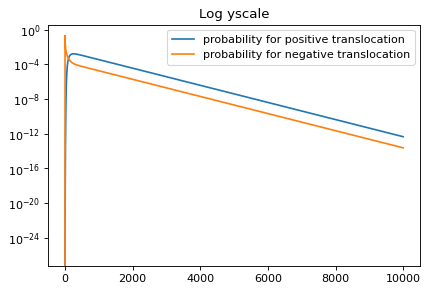

In [ ]:
# the same plots but in log scale

plt.figure(dpi = 80)
plt.plot(Y_pos_real, label = 'probability for positive translocation')
plt.legend()

plt.plot(Y_neg_real, label = 'probability for negative translocation')
plt.legend()

plt.yscale('log')
plt.title('Log yscale')
plt.show()

## Initial data

Parametrizing initial distributions (polynomial of 4 degree) - 600 initial data

In [ ]:
import pandas as pd
X = pd.read_csv('X for save').set_index('Unnamed: 0')
import numpy as np
X = np.array(X)
X_parametr_pol = np.zeros([X.shape[0], 5])
for i in range (X.shape[0]):
    poly = Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', LinearRegression(fit_intercept=False))])
    a = np.arange (51)
    b = X[i]
    #plt.plot(a,b)
    poly.fit(a.reshape(-1,1), b)
    b_pred = poly.predict(a.reshape(-1,1))
    X_parametr_pol[i] = np.array(poly.named_steps['linear'].coef_)

### the next 2 cells havn't been used in the progrmam yet but may be in the future 

In [ ]:
Y_pos_new = pd.read_csv('y_pos for save').set_index('Unnamed: 0')
Y_neg_new = pd.read_csv('y_neg for save').set_index('Unnamed: 0')
rate = pd.read_csv('rate for save').set_index('Unnamed: 0')

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
diff_pos = np.zeros(Y_pos_new.shape[0])
diff_neg = np.zeros(Y_pos_new.shape[0])
diff = np.zeros(Y_pos_new.shape[0])
for i in range (len(Y_pos_new)):
  diff_pos[i] = mse(np.log(np.array(Y_pos_new.iloc[i][1:])),np.log(Y_pos_real[1:]))
  #print(diff_pos[i])
  diff_neg[i] = mse(np.log(Y_neg_new.iloc[i][1:]),np.log(Y_neg_real[1:]))
  #print(diff_neg[i])
  diff[i] = diff_pos[i]+ diff_neg[i]

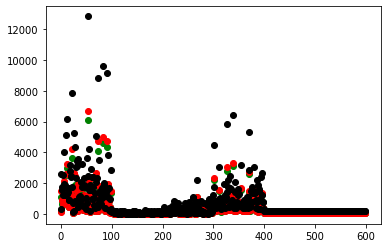

In [ ]:
plt.scatter(np.arange(600),diff_pos, color = 'green')
#plt.title('MSE with positive')
#plt.show()
plt.scatter(np.arange(600),diff_neg, color = 'red')
#plt.title('MSE with negative')
#plt.show()
plt.scatter(np.arange(600),diff, color = 'black')
#plt.title('Neg+pos (1:1)')

## Constructing function for optimization

In [ ]:
import subprocess
subprocess.call(["gfortran","-o","outputic","F.f90"]) #just for compile the programm

0

In [ ]:

def Fokker_plank_eq (x_end):
  
    # real data
    dat2 = pd.read_csv('try_to_estim_res1.txt', sep=' ',skiprows=[0,1], header=None)
    dat2.drop(dat2.columns[0], axis = 1, inplace = True)
    Y_pos_real = np.array(dat2[:][1])
    Y_neg_real = np.array(dat2[:][2])

    #saving new input data
    N = 51
    t = 1
    num1 = 50000
    f = open('./new_input.txt', 'w')
    f.write(str(N-1) + '\t'+ str(t) + '\n' + str(num1)+ '\t'+ str(t) +'\t' + str(10000)+ '\t'+ str(t) + '\n' )
    x = []
    y = []
    for i in range (N-1):
          x.append(i)
          y.append(polynom(i, x_end)[0])
          f.write (str(i) + '\t' + str(real(y[i])) + '\n')
    x.append(50)
    y.append(polynom(50, x_end)[0])
    f.write (str(50) + '\t' + str(y[49]))
    f.close()
    print(x_end)
    plt.plot(y)

    #fortran programm - making new distributions
    subprocess.check_output(["./outputic"])
    #saving new output data
    dat = pd.read_csv('./new_output.txt', sep=' ',skiprows=[0,1], header=None)
    dat.drop(dat.columns[0], axis = 1, inplace = True)

    #checking for some bugs in the saved new data
    for i in range (1,dat.shape[0]):
        if str(dat[1][i]).find('E')==-1 and str(dat[1][i]).find('e')==-1 and str(dat[1][i]).find('-') !=-1 and str(dat[1][i]).find('nan') == -1:
          dat[1][i] = (str(dat[1][i]).split('-')[0]) + 'E' + '-' + (str(dat[1][i]).split('-')[1])
        if str(dat[1][i]).find('nan') != -1 or float(dat[1][i]) == 0 and i != 0:
          dat[1][i] = dat[1][i-1]
        if str(dat[2][i]).find('E')==-1 and str(dat[2][i]).find('e')==-1 and str(dat[2][i]).find('-') !=-1 and str(dat[2][i]).find('nan') == -1:
          dat[2][i] = (str(dat[2][i]).split('-')[0]) + 'E' + '-' + (str(dat[2][i]).split('-')[1])
        if str(dat[2][i]).find('nan') != -1 or float(dat[2][i]) == 0 and i != 0:
          dat[2][i] = dat[2][i-1]

    Y_pos_new = np.array(dat[1][:], dtype = float)
    Y_neg_new = np.array(dat[2][:], dtype = float)
        

    # mse for minimization
    diff_new = mse(np.log(Y_pos_new[1:]),np.log(Y_pos_real[1:])) + mse(np.log(Y_neg_new[1:]),np.log(Y_neg_real[1:]))
    return diff_new

In [7]:
# polynomial function - inverse parametrizing 
def polynom(x, param):
  param = param.reshape(-1,1)
  return param[0] + x*param[1]+ x**2*param[2]+ x**3*param[3] + x**4*param[4] #+ x**5*param[5] + x**6*param[6] + x**7*param[7] + param[0]

## BO optimization

In [ ]:
#bounds for our function

space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5e-1,5e-1)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-1e-1,1e-1)},
        {'name': 'var_3', 'type': 'continuous', 'domain': (-1e-2,1e-2)},
        {'name': 'var_4', 'type': 'continuous', 'domain': (-1e-3,1e-3)},
        {'name': 'var_5', 'type': 'continuous', 'domain': (-1e-4,1e-4)}]
        
#constraints = [{'name': 'constr_1', 'constraint': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
              #{'name': 'constr_2', 'constraint': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

In [ ]:
GPyOpt.methods.BayesianOptimization?

[[-4.54944658e-01  6.38882607e-02  3.10064545e-02 -1.54291971e-03
   1.82126935e-05]]
[[ 1.31119545e-01  1.50862810e-02 -1.32562759e-02  9.53322915e-04
  -1.40018185e-05]]
[[ 6.82248793e-01  9.61826532e-02  2.15482659e-03 -2.28290191e-04
   2.87021965e-06]]
[[-4.36176724e-01  9.49408147e-03  3.17286359e-02 -1.50166909e-03
   1.75330343e-05]]
[[ 2.86417607e-01 -9.47186301e-03  7.68167947e-03 -2.56423726e-04
   2.18648498e-06]]
[[ 5.12076507e-01  1.72876670e-02  9.87265425e-03 -3.93972229e-04
   3.80817142e-06]]
[[ 7.96449421e-02 -3.41522255e-02  2.30699020e-02 -9.82401255e-04
   1.07504308e-05]]
[[ 3.39989660e-01 -2.49250093e-02  1.06996244e-02 -3.31034349e-04
   2.63993531e-06]]
[[ 1.83158759e-01 -6.34742533e-02  9.44517969e-03 -1.79080963e-04
   4.82549825e-07]]
[[ 2.92786109e-01 -3.51392744e-02  1.14698245e-02 -3.68072661e-04
   3.11312477e-06]]
[[ 6.80286365e-01 -4.21295725e-01  5.12124530e-02 -1.53752686e-03
   1.35243586e-05]]
[[ 1.44393721e+00 -8.06052956e-01  8.18726923e-02 -2.3

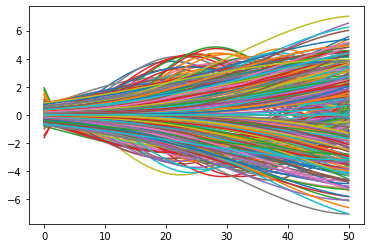

In [ ]:
seed(12345)
# BO object
kernel = GPy.kern.RBF(1, 1.5, 2)
model = GPyOpt.models.GPModel(optimize_restarts=3,exact_feval = True, verbose=True) #GP model without noize and with 3 restarts
#model.model = m

myBopt = GPyOpt.methods.BayesianOptimization(f = Fokker_plank_eq,        # function to optimize       
                                             domain = space,        # box-constraints of the problem
                                             #constraints = constraints, we have no constrains
                                             model = model,
                                             X = X_parametr_pol, #возможно, легче самим добавить точки, но это мы еще посмотрим
                                             #Y = diff,
                                             #initial_design_numdata = 20, #number of initial points
                                             #initial_design_type = 'random',
                                             normalize_Y = True,
                                             verbosity = True,
                                             acquisition_type ='MPI') # acquisition = Expected improvement

                              

Optimization restart 1/3, f = -460.12912426588866
Optimization restart 2/3, f = -460.129124248062
Optimization restart 3/3, f = -460.12912425453607
[[-1.06353683e-03  3.40867996e-03  7.64701319e-04 -2.29018602e-04
  -4.13165958e-06]]
Optimization restart 1/3, f = -40.03663998472018
Optimization restart 2/3, f = -40.036639985769966
Optimization restart 3/3, f = -40.03663998527077
[[ 1.09643609e-02  6.96291262e-03 -4.09992048e-04  3.04164888e-05
  -1.58715829e-07]]
Optimization restart 1/3, f = -38.98000668132465
Optimization restart 2/3, f = -38.980006681430666
Optimization restart 3/3, f = -38.98000668359276
[[-1.03835698e-03  3.70840478e-03 -8.04979123e-04  3.60593346e-05
   4.63027546e-06]]
Optimization restart 1/3, f = -22.501680903133547
Optimization restart 2/3, f = -22.50168090015825
Optimization restart 3/3, f = -22.50168090124572
[[ 1.50181786e-03  4.25713273e-03 -3.76016133e-04  4.32097465e-05
   2.28917424e-07]]
Optimization restart 1/3, f = -22.487320620425123
Optimization r

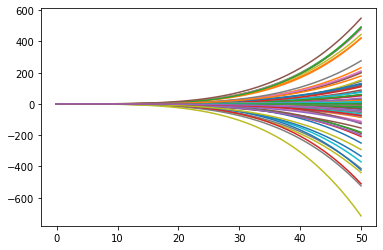

In [ ]:
myBopt.run_optimization(125)

In [ ]:
#results of optimization
myBopt.x_opt

array([-2.04457258e-01,  5.80240211e-02, -1.06140060e-02,  2.75249231e-04,
       -1.82317347e-06])

In [ ]:
X_parametr_real

array([-1.61016519e-01,  4.66294938e-02, -9.65040028e-03,  3.07091517e-04,
       -2.67150435e-06])

In [8]:
#coff = [-2.04457258e-01,  5.80240211e-02, -1.06140060e-02,  2.75249231e-04, -1.82317347e-06]
#coff = np.array(coff)
distr = polynom(np.arange(51), myBopt.x_opt)

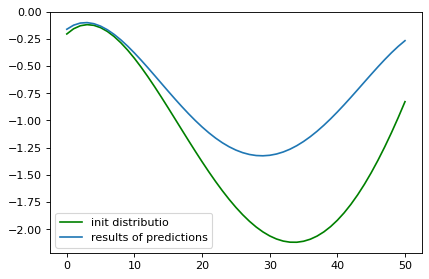

In [10]:
plt.figure(dpi = 80)
plt.plot(distr, color = 'g', label = 'init distributio')
plt.plot(b_pred, label = 'results of predictions', )
plt.legend()